# Implentation of a PID Controller to optimize the Efficiency during the Charging Process of a Storage Device filled with Phase Change Material


# Introduction

Being able to store energy for later use during a different season of the year is a key part in transforming our energy supply towards using more renewable sources. A solution to this problem using a thermal storage device filled with phase change material (PCM) was proposed in an earlier project. The storage system was carefully studied to understand the behavior of the charging process of the PCM cells. This study lead to the discovery of the following system properties:

- The efficiency of the charging process is highly dependent on the temperature of the water input
- A considerable amount of energy is lost due to the high temperature of the water output

In order to further investigate and address those two key findings, a new study was performed on an extended system. The extended system contains the previously suggested PCM energy storage device with an additional mixing valve to allow varying of the temperature of the water input.

To make use of the large quantity of energy that is still available in the outflowing water of the PCM device, an additional component is introduced. This additional component is a heat exchanger, that further reduces the energy in the water and uses the obtained energy to heat a building.

Instead of just allowing the water to leave the system, a circulation is introduced such that all or part of the outflowing water is fed back to the input of the PCM cell through a mixing valve.

This circulation further increases the energy efficiency of the entire system. The circulation does however also cause the temperature of the incoming water to vary over time. This is an issue as the PCM storage device operates best at a fixed input temperature. Therefore a PID controller is implemented and tuned to ensure that the temperature of the water input is maintained constant by adjusting the mixing valve.

The PID controller needs to be able to compensate for the varying demand of the heat exchanger such that the temperature of the water at the output of the mixing valve remains constant even if the temperature at the inputs suddenly change.

# Problem Definition

---> Etienne

| Quantity | Symbol | Value | Units | Comments |
    "| :------- | :----: | :---: | :---- | |\n",
    "| Activation Energy | $E_a$ | 72,750 | J/gmol | |\n",
    "| Arrehnius pre-exponential | $k_0$ | 7.2 x 10<sup>10</sup> | 1/min | |\n",
    "| Gas Constant | $R$ | 8.314 | J/gmol/K | |\n",
    "| Reactor Volume | $V$ | 100 | liters | |\n",
    "| Density | $\\rho$ | 1000 | g/liter | |\n",
    "| Heat Capacity | $C_p$ | 0.239 | J/g/K | |\n",
    "| Enthalpy of Reaction | $\\Delta H_r$ | -50,000 | J/gmol | |\n",
    "| Heat Transfer Coefficient | $UA$ | 50,000 | J/min/K | |\n",
    "| Feed flowrate | $q$ | 100 | liters/min | |\n",
    "| Feed concentration | $c_{A,f}$ | 1.0 | gmol/liter | |\n",
    "| Feed temperature | $T_f$ | 350 | K | |\n",
    "| Initial concentration | $c_{A,0}$ | 0.5 | gmol/liter | |\n",
    "| Initial temperature | $T_0$ | 350 | K | |\n",
    "| Coolant feed temperature | $T_{cf}$ | 300 | K |  |\n",
    "| Nominal coolant flowrate | $q_c$ | 50 | L/min | primary manipulated variable |\n",
    "| Cooling jacket volume | $V_c$ | 20 | liters | |"

| Quantity | Symbol |
| --- | --- |
| Enthalpy at the Inlet 1 of the mixing Valve | $\dot{H}_1$ |
| Enthalpy at the Inlet 2 of the mixing Valve | $\dot{H}_2$ |
| Enthalpy at the Outlet of the mixing Valve | $\dot{H}_{mix}$ |
| Enthalpy at the Outlet of the PCM cell | $\dot{H}_{out}$ |
| Enthalpy that is not reused | $\dot{H}_{waste}$ |
| Enthalpy that is recycled | $\dot{H}_{reused}$ |
| Disturbance | $\dot{Q}_{dist}$ |
| Temperature at the Inlet 1 of the mixing Valve | $T_1$ |
| Temperature at the Inlet 2 of the mixing Valve | $T_{2B}$ |
| Temperature at the Outlet of the mixing Valve | $T_{mix}$ |
| Temperature at the Outlet of the PCM Cell | $T_{out}$ |
| Temperature at the Outlet of the PCM Cell | $T_{2A}$ |
| Valve Position | $\alpha$ |
| Setpoint of the PID-Controller | SP |
| Measured Point of the PID-Controller | PV |
| Output Signal of the PID-Controller | MV |






# Physical Model

## Description of the Storage Device
The Storage Device in this Model is filled with PCM which melts at a melting temperature  of 58°C. More of the behavior of this Phase Change Material can be seen in [the Project PCM Melting](pcm_melting_project.ipynb). The PCM cell is melted with hot water that flows on the top surface of the cell. Therefore heat is transfered with convection from the water to the PCM. To make sure that the inlet Temperature stays constant in the whole charging process of the PCM cell a PID-Controller is implemented. This controller enables energy recovery in the melting process as well. Therefore hot water from the output can be recycled. There is a mixing valve implemented in the control cycle and a disturbance as well. 

## Boundary Conditions
As boundary conditions the inlet Temperature of $T_1$ is set to 85°C and the mass flow into the PCM cell $\dot{m}_{mix}$ is set to 10 m/s. These conditions are the same than in the report [the Project PCM Melting](pcm_melting_project.ipynb). The Setpoint of the controller is set to 75°C.


Boundary Conditions: 
$$ T_1 = const.$$
$$ \dot{m}_{mix} = const. $$
$$ SP = const. $$

## Mathematical Correlations in the System
The figure shows where which enthalpy, temperature and mass flow can be found in the model. The mathematical correlations can be found in the energy balances of the system. 

The Equations of enthalpy in the system are the following: 

$$ \dot{H}_{mix} = \dot{H_1} + \dot{H_2}$$
$$ \dot{H}_{2} = \dot{H}_{reused} - \dot{Q}_{dist}$$
$$ \dot{H}_{reused} = \dot{H_{out}} - \dot{H}_{waste}$$
$$ \dot{H}_{out} = \dot{H}_{mix} - \dot{Q}_{charge}$$
where: 

$$ \dot{H}_1 = (1-\alpha) \cdot \dot{m}_{mix} \cdot c_{p,w} \cdot T_1$$
$$ \dot{H}_2 = \alpha \cdot \dot{m}_{mix} \cdot c_{p,w} \cdot T_{2B}$$

and: 
$$ T_{mix} = (1-\alpha) \cdot  T_1 + \alpha \cdot T_{2b}$$
$$ T_{2B} = T_{2A} - T_{dist}$$
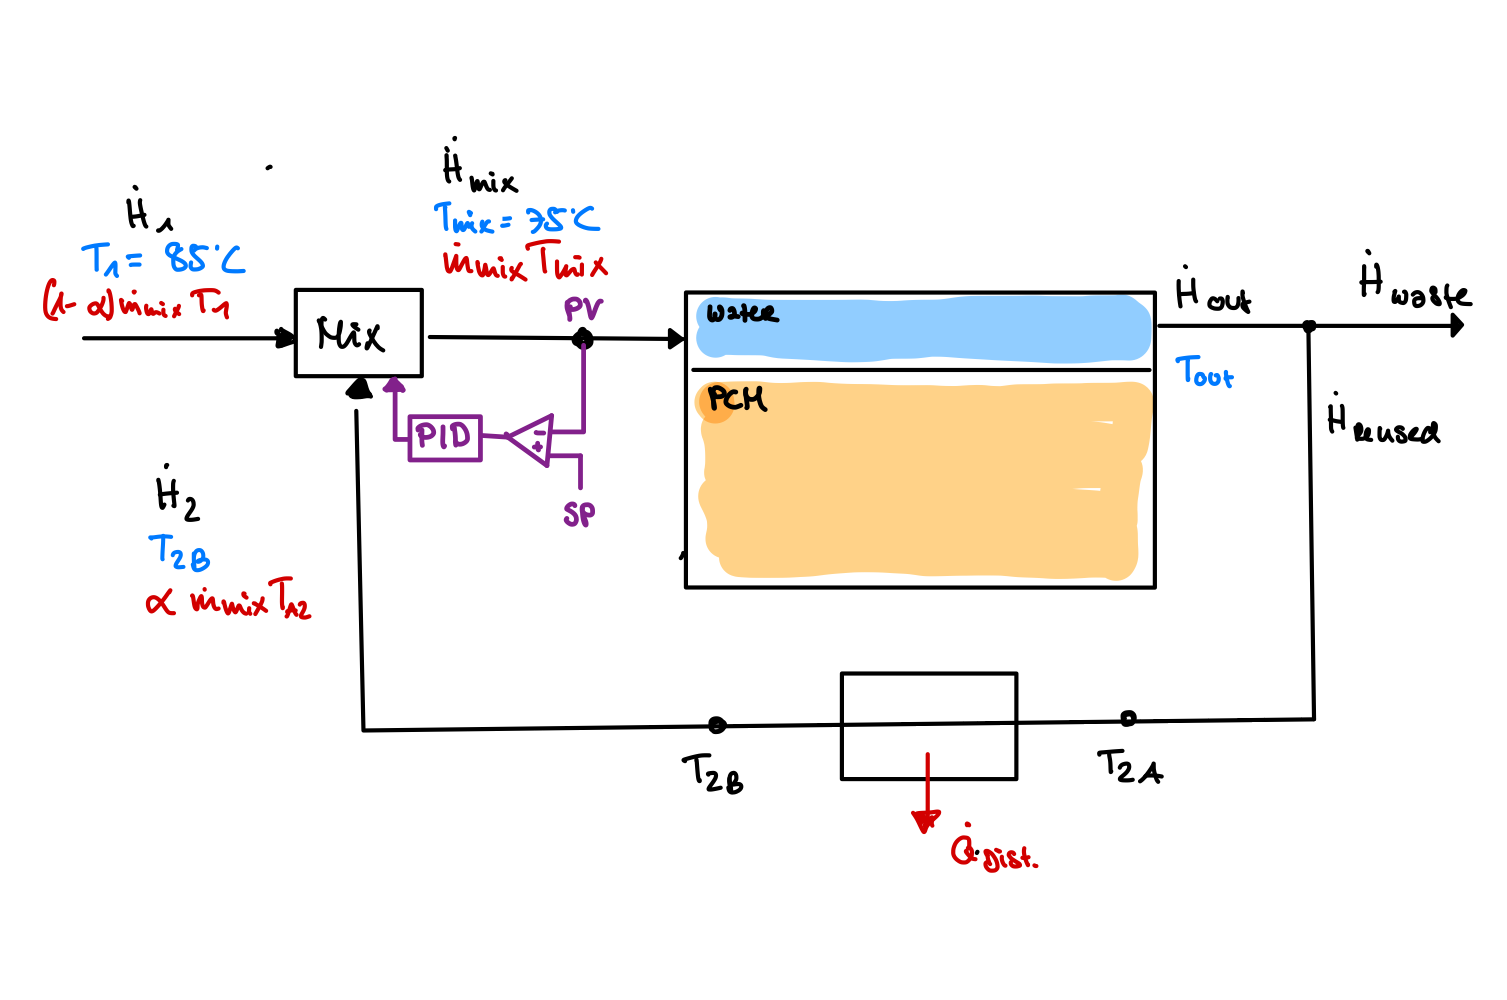
> Figure: Scheme of the Physical Model with the Controller, which is implemented to control the mixing valve and a disturbance which influences the Temperature $T_{2b}$ that flows into the mixing valve.

## Mixing Valve and PID Controller

The PID Controller is controlling the $\alpha$ value of the mixing valve to ensure constant temperature on the outlet of the mixing process.

The Equations of the valves is the following:
$$ \dot{H}_{mix} = \dot{H_1} + \dot{H_2}$$

and the Temperature correlation between $T_1$, $T_{2B}$ and $T_{mix}$ is: 
$$ T_{mix} = (1-\alpha) \cdot  T_1 + \alpha \cdot T_{2b}$$



## Disturbance

# PID Controller Theory

## Principle of the Controller

# Initial System Behavior

---> Selina

## Disturbance Signal


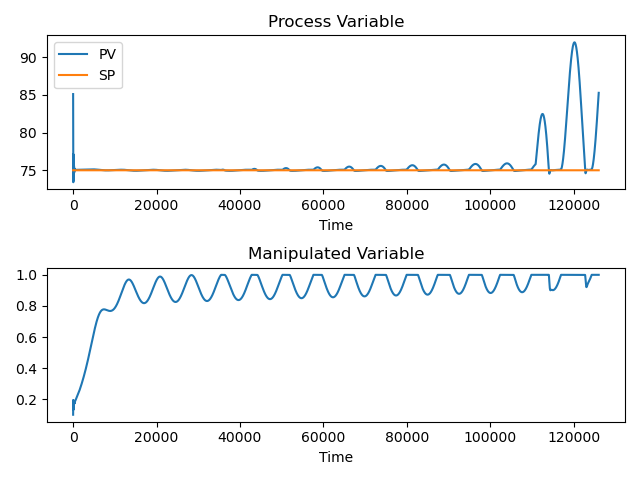
> Figure: sjfhakshfshf


# Parameterstudy

--> Selina

## Variation of the Proportional Control Gain
--> Etiene

## Variation of the Integral Control Gain
--> Etienne

## Variation of the Disturbance Signal
---> Etienne

# Conclusion
---> Selina

# Outlook

In [16]:
---> Selina

SyntaxError: invalid syntax (4035162128.py, line 1)